# Stationarity test: Dickey Fuller

Null Hypothesis: The Time series is **not stationary**



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

# Print out results of Dickey Fuller test
def test_stationarity(timeseries):
    dftest   = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)


Text(0.5,1,'Milk Production')

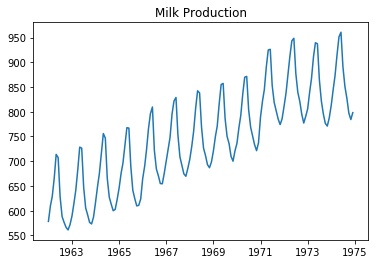

In [12]:
# Load the data Milk production
milk_prod = pd.read_csv('data/monthly-milk-production-pounds-p.csv', 
                        parse_dates = ['month'], 
                        index_col = 'month', 
                        infer_datetime_format = True)
milk_prod.columns = ['volume']
plt.plot(milk_prod.volume)
plt.title('Milk Production')
# Obviously non stationary because of trend

In [13]:
# Dickey Fuller test
dftest   = adfuller(milk_prod.volume, autolag='AIC')
print("p-value: %0.4f \n\n=> Cannot reject Null Hypothesis"% dftest[1] )

p-value: 0.6831 

=> Cannot reject Null Hypothesis


# Tree Rings data

Text(0.5,1,'Tree rings')

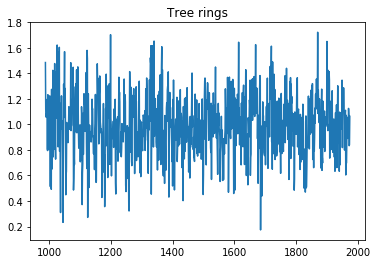

In [14]:
trees = pd.read_csv('data/tree-rings.csv', parse_dates = ['year'], index_col = 'year', infer_datetime_format = True)
plt.plot(trees.rings)
plt.title('Tree rings')

In [15]:
dftest   = adfuller(trees.rings, autolag='AIC')
print("p-value: %.3e => Reject Null Hypothesis \n\n=> Tree rings data is stationary"% dftest[1] )


p-value: 1.213e-14 => Reject Null Hypothesis 

=> Tree rings data is stationary


# Differencing

Make a new time series of the difference shifted by 1

$$  X\_t =  Y\_t - Y\_{t-1} $$

* Apply to the milk production ts
* Plot the TS
* Apply Dickey Fuller test

p-value for volume: 0.683 => Can't reject Null Hypothesis
p-value for difference: 0.066 => reject Null Hypothesis => Stationary


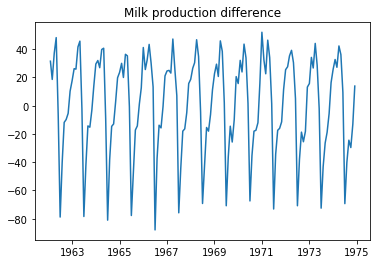

In [16]:
milk_prod['difference'] = milk_prod.volume - milk_prod.volume.shift(1)
plt.plot(milk_prod.difference)
plt.title('Milk production difference')
# Removed the trend but not the seasonality
dftest   = adfuller(milk_prod.volume, autolag='AIC')
print("p-value for volume: %.3f => Can't reject Null Hypothesis"% dftest[1] )

dftest   = adfuller(milk_prod.difference.dropna(), autolag='AIC')
print("p-value for difference: %.3f => reject Null Hypothesis => Stationary"% dftest[1] )

# Is the Difference series a white noise?

* ACF and PACF Plots 
* Mean, Variance?
* Autocorrelation?

# Is the tree.rings series a white noise?


33.864402829228055

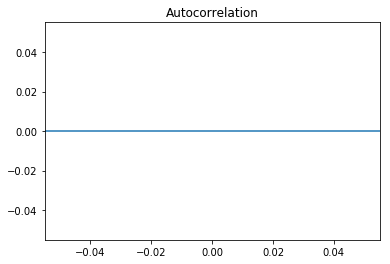

In [18]:
import statsmodels.api as sm
import numpy as np
# sm.graphics.tsa.plot_pacf(milk_prod.volume, lags=50)
sm.graphics.tsa.plot_acf(milk_prod.difference, lags=50)

np.mean(milk_prod.difference)
np.std(milk_prod.difference)


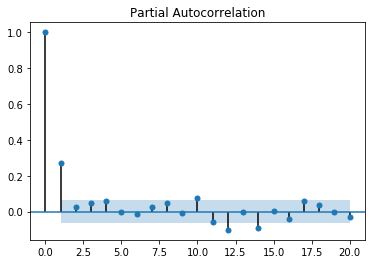

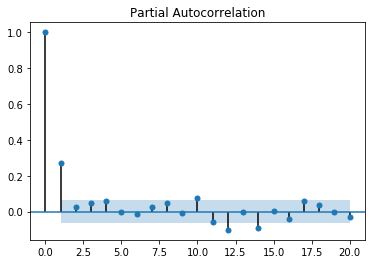

In [26]:
sm.graphics.tsa.plot_pacf(trees.rings, lags=20)

# Ljung - Box test

http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html

        statsmodels.stats.diagnostic.acorr_ljungbox(x, lags=None, boxpierce=False)

            Ljung-Box test for no autocorrelation
            Parameters:	

            x : array_like, 1d

                data series, regression residuals when used as diagnostic test

            lags : None, int or array_like

                If lags is an integer then this is taken to be the largest lag that is included, the test result is reported for all smaller lag length. If lags is a list or array, then all lags are included up to the largest lag in the list, however only the tests for the lags in the list are reported. If lags is None, then the default maxlag is 12*(nobs/100)^{1/4}

            boxpierce : {False, True}

                If true, then additional to the results of the Ljung-Box test also the Box-Pierce test results are returned


In [20]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# first test on real white noise

import numpy as np
samples = np.random.normal(0, 1, size=1000)
lbtest = acorr_ljungbox(samples, 20)
print( "\np-values for h = 10: %s \n\n"% lbtest[1][9] )
print( "p-values for different lags h: %s "% lbtest[1] )





p-values for h = 10: 0.0986451382974 


p-values for different lags h: [ 0.36119323  0.2546556   0.36325112  0.47904658  0.62454358  0.70178269
  0.31220545  0.06652566  0.09519259  0.09864514  0.13420421  0.06304247
  0.08205114  0.09197472  0.10243342  0.13482496  0.14551013  0.18599175
  0.19871781  0.23686179] 


In [93]:
# is the milk_prod.difference white noise? and the tree rings?
milk_prod.difference = milk_prod.difference - np.mean(milk_prod.difference)

lbtest = acorr_ljungbox(milk_prod.difference.dropna(), 30)
print("Is the milk_prod.difference a white noise?")
print( "\np-values for h = 24 (2*m) :  %s \n\n"% lbtest[1][23] )
print( "p-values for different lags h: %s "% lbtest[1] )

lbtest = acorr_ljungbox(trees.rings.dropna(), 10)
print("\n\n---\nIs the tree.rings a white noise?")
print( "\np-values for h = 10 :  %s \n\n"% lbtest[1][9] )
print( "p-values for different lags h: %s "% lbtest[1] )


Is the milk_prod.difference a white noise?

p-values for h = 24 (2*m) :  7.56986633516e-165 


p-values for different lags h: [  1.09334576e-014   1.27059297e-014   3.61758241e-014   2.41310741e-016
   1.74681868e-025   1.88776200e-038   9.21968853e-047   1.10353200e-048
   2.52559467e-048   2.18817161e-048   4.39879372e-059   1.23891862e-087
   6.94721489e-099   5.34608000e-099   1.60015049e-098   2.29513235e-100
   9.62064468e-109   1.10674291e-120   3.11204584e-128   8.31556725e-130
   2.23060147e-129   2.38602813e-129   5.23818908e-139   7.56986634e-165
   5.43204306e-175   4.79908005e-175   1.69897583e-174   5.46752471e-176
   1.68057834e-183   3.95181512e-194] 


---
Is the tree.rings a white noise?

p-values for h = 10 :  2.89061588676e-19 


p-values for different lags h: [  9.23223047e-18   8.65821371e-19   3.89559574e-19   4.93936455e-20
   1.02825939e-19   4.59515819e-19   1.19272582e-18   6.32347724e-19
   1.63995497e-18   2.89061589e-19] 


In [21]:
# Normal test for milk difference
from scipy import stats

stats.normaltest(milk_prod.difference.dropna())

# Normal test for tree rings
stats.normaltest(trees.rings.dropna())


NormaltestResult(statistic=2.2090206247361235, pvalue=0.33137311183224838)